# DEEP LEARNING _ FINAL PROJECT (PART 4)

> ## Members: 
> <p style="text-align: left;"><font color = blue > Amanuel Abrdo Tereda</p>
> <p style="text-align: left;"><font color = blue > Stefalo Acha</p>

***
> *Date: May 02, 2023*
> ### <p style="text-align: right;">Instructor: <font color = blue > Dr. Letu Qingge</p>
***



## Image classification with Transfer Learning
***


#  Setting up the environment and installing key libraries

> **First run these commands inside <span style="font-family:consolas">GitBash_Terminal/CMD:**
* <font color = blue > First thing Check whether we have installed the libraries within that environment </font>
    *  <span style="font-family:consolas"> conda list </span>
* <font color = blue > Update conda </font>
    * <span style="font-family:consolas"> conda update anaconda-navigator </span>
    * <span style="font-family:consolas"> conda update navigator-updater </span>
 
* **Import <font color = red > cv2** </font>
    * <span style="font-family:consolas"> pip install opencv-python </span>
* **Import <font color = red > tensorflow** </font>
    * <span style="font-family:consolas"> pip install tensorflow </span>
* **Import <font color = red > tensorflow_hub** </font>
    * <span style="font-family:consolas"> pip install tensorflow_hub </span>

In [ ]:
import numpy as np
import cv2
import pandas as pd

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Choose a Pre-Trained model from Tensorflow hub 
***

> * We will use a pre-trained model from a place called Tensorflow hub
> * Google has come up with this Tensorflow hub where we can get an access of different pre-trained models which are trained in a huge dataset which we can import and directly use it
> * https://tfhub.dev/
> * https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4
***


# Prepare the classifier (pre-trained model)
***
* Set the size of the image
* Import a classifier from tensorflow_hub website
* IMAGE_SHAPE+(3,) = add a 3rd dimension to the picture. So it will make it 224 x 224 x 3

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

## Download the name of the classes
***
* Download the .txt file which contains the name of the 1000 classes from tensorflow website
* http://download.tensorflow.org/data/ImageNetLabels.txt

In [ ]:
!wget http://download.tensorflow.org/data/ImageNetLabels.txt

--2023-04-28 02:27:56--  http://download.tensorflow.org/data/ImageNetLabels.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.122.128, 2607:f8b0:4004:c08::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.122.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10484 (10K) [text/plain]
Saving to: ‘ImageNetLabels.txt’

ImageNetLabels.txt  100%[===================>]  10.24K  --.-KB/s    in 0s      

2023-04-28 02:27:56 (247 MB/s) - ‘ImageNetLabels.txt’ saved [10484/10484]



In [ ]:
f = open("ImageNetLabels.txt", "r")
print(f.read())

In [ ]:
df = pd.read_csv("ImageNetLabels.txt")
df

,background
0,tench
1,goldfish
2,great white shark
3,tiger shark
4,hammerhead
...,...
995,earthstar
996,hen-of-the-woods
997,bolete
998,ear


## Test the model using a random picture.
***

In [ ]:
!wget https://christianministryedu.org/wp-content/uploads/2022/04/what-is-protestant-church.jpg 

src = "what-is-protestant-church.jpg"
rename = "Image.jpg"

import os
os.rename(src, rename)

--2023-04-28 02:27:56--  https://christianministryedu.org/wp-content/uploads/2022/04/what-is-protestant-church.jpg
Resolving christianministryedu.org (christianministryedu.org)... 54.151.87.184
Connecting to christianministryedu.org (christianministryedu.org)|54.151.87.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 284609 (278K) [image/jpeg]
Saving to: ‘what-is-protestant-church.jpg’

what-is-protestant- 100%[===================>] 277.94K  1002KB/s    in 0.3s    

2023-04-28 02:27:57 (1002 KB/s) - ‘what-is-protestant-church.jpg’ saved [284609/284609]



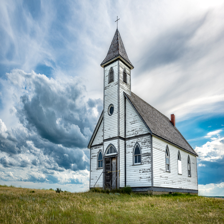

In [ ]:
image = Image.open('Image.jpg').resize(IMAGE_SHAPE)
image

In [ ]:
image = np.array(image)
image

* Normalize or scale the image (each integer in the matrix must be between 0 and 1) 
* Given that the color spectrum ranges from 0 to 255, we must divide it by 255.

In [ ]:
image = np.array(image)/255.0
image

### Add one more dimension into the size of the image
* The reason for this is because prediction takes many images as input. We can't use only one image as an input.

In [ ]:
image[np.newaxis, ...].shape

(1, 224, 224, 3)

### Try the model to classify the image

In [ ]:
# The numbers displayed here represent the predictions made by the classifier for each class.

result = classifier.predict(image[np.newaxis, ...])
result

1/1 [==============================] - 2s 2s/step


array([[ 0.31939343, -0.59524804,  0.53953975, ..., -1.1072778 ,
        -0.26376906, -0.82323873]], dtype=float32)

In [ ]:
result.shape

(1, 1001)

In [ ]:
# arg max = provide us the value of the index with the highest value.

predicted_label_index = np.argmax(result)
predicted_label_index

498

In [ ]:
# List the classes in their names to determine the classes' names based on the index.

image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()


### Predict

In [ ]:
image_labels[predicted_label_index]

'church'

# Download a flower dataset from Tensorflow that will be used for transfer learning.
***

In [ ]:
# cache_dir indicates where to download data.'.' means current directory
# 'untar=true' will unzip it

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 3s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
# Use pathlib model to convert the string path into windows path
# the reason is to be able to access all the images

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
# The glob module finds all the path_names matching a specified pattern ...
# according to the rules used by the Unix shell ('*/*.jpg'), 
# although results are returned in arbitrary order.

list_images = list(data_dir.glob('*/*.jpg'))
list_images

In [ ]:
image_count = len(list_images)
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2675221506_5286c0595f.jpg'),
 PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg'),
 PosixPath('datasets/flower_photos/roses/8926641787_d2515dfe8f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15104537437_f6730b38c3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/19440805164_920b28da61_n.jpg')]

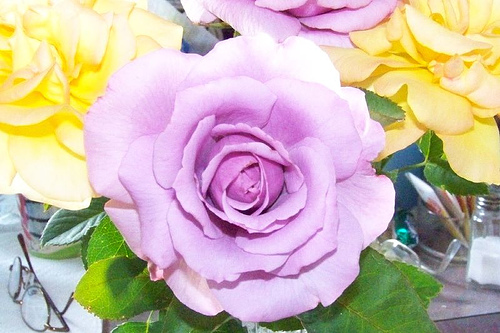

In [ ]:
Image.open(str(roses[33]))

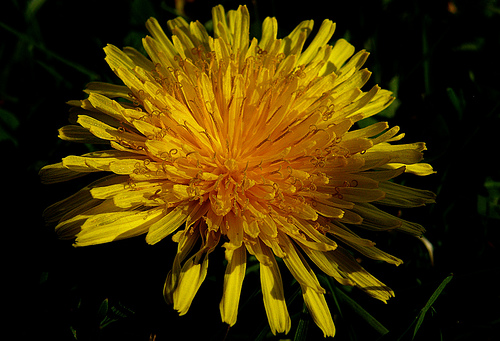

In [ ]:
dandelion = list(data_dir.glob('dandelion/*'))
Image.open(str(dandelion[333]))

## Make up python dictionary
***
* So that the key of the dictionary name is the flower name, and the value is the list of images

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_images_dict['roses']

## Creating a label directroy 
***
* Because machine learning module doesn't understand text, we need to give indexes for the name of the classes

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_labels_dict.keys()

dict_keys(['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips'])

In [ ]:
list(flowers_labels_dict.keys())[0]

'roses'

## Resize all the images in to same size (224 x 224 x 3)
***

In [ ]:
# Check one of the images for their size

img = str(flowers_images_dict['roses'][0])
img = cv2.imread(img)
img

In [ ]:
img.shape

(375, 500, 3)

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
# Resize all images using for loop

x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(IMAGE_SHAPE)) #IMAGE_SHAPE = (224,224)
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
x[0].shape

(224, 224, 3)

In [ ]:
x = np.array(x)
y = np.array(y)

## Split dataset into training and test segments.
***

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=25)

#x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=25)

In [ ]:
#Scale the array in b/n 0 and 1

# x_train_scaled, x_test_scaled = x_train / np.std(x_train), x_test / np.std(x_train) # Wtih STD

x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
x_train_scaled[0]

## Before training the dataset with transfer learning, use the pre-trained classifier to predict the flowers.
***

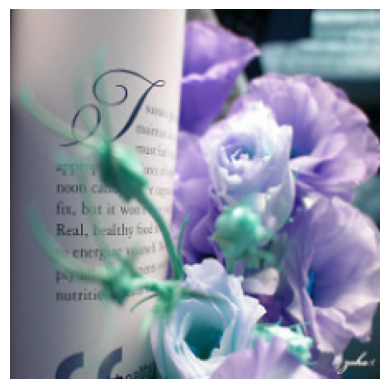

In [ ]:
#try_any_image = 444

try_any_image = 444

img = cv2.resize(try_any_image,(224,224)).shape

plt.axis('off')
plt.imshow(x[try_any_image])

In [ ]:
predicted = classifier.predict(np.array([x[try_any_image]]))
predicted = np.argmax(predicted, axis=1)[0]

predicted

1/1 [==============================] - 1s 524ms/step


795

In [ ]:
image_labels[predicted]

'shower curtain'

# Retrain the model using a feature extractor model
***
* What makes it different from the previous classifier is that
    * This model produces an identical model as the previous one, with the exception of the last layer, which distinguishes it from the previous classifier.
    * In the previous classifier, the last component was "classification," but it is now "feature vector."
    

> * **trainable=False** is the important parameter. *'False'* means **freeze**, which means do not train.
> * So, all of those layers up until the last layer will have identical weights to the previously trained model when we conduct the training.

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)


## Create the new model and train the model by applying Transfer Learning
***

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
]) # here is the last layer we changed. Instead of 1000 classes it classifies the dataset into 5 flower classes

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

# model.fit(x_train_scaled, y_train, epochs=5)

model_fit = model.fit(x_train_scaled, y_train, epochs = 15, validation_split = 0.2, batch_size=77)

Epoch 1/15
26/26 [==============================] - 60s 2s/step - loss: 1.1088 - acc: 0.5634 - val_loss: 0.7156 - val_acc: 0.7388
Epoch 2/15
26/26 [==============================] - 54s 2s/step - loss: 0.5570 - acc: 0.8103 - val_loss: 0.5694 - val_acc: 0.7694
Epoch 3/15
26/26 [==============================] - 55s 2s/step - loss: 0.4270 - acc: 0.8625 - val_loss: 0.5203 - val_acc: 0.7980
Epoch 4/15
26/26 [==============================] - 54s 2s/step - loss: 0.3643 - acc: 0.8870 - val_loss: 0.4803 - val_acc: 0.8265
Epoch 5/15
26/26 [==============================] - 65s 3s/step - loss: 0.3176 - acc: 0.9013 - val_loss: 0.4547 - val_acc: 0.8224
Epoch 6/15
26/26 [==============================] - 54s 2s/step - loss: 0.2765 - acc: 0.9238 - val_loss: 0.4420 - val_acc: 0.8388
Epoch 7/15
26/26 [==============================] - 65s 3s/step - loss: 0.2538 - acc: 0.9356 - val_loss: 0.4275 - val_acc: 0.8306
Epoch 8/15
26/26 [==============================] - 65s 3s/step - loss: 0.2288 - acc: 0.94

## Check the performance of the test dataset 
### (Evaluate the accuracy on a test dataset)
***

In [ ]:
model.evaluate(x_test_scaled, y_test)

39/39 [==============================] - 26s 654ms/step - loss: 0.3700 - acc: 0.8668


[0.37001797556877136, 0.866830050945282]

## Sample prediction
***

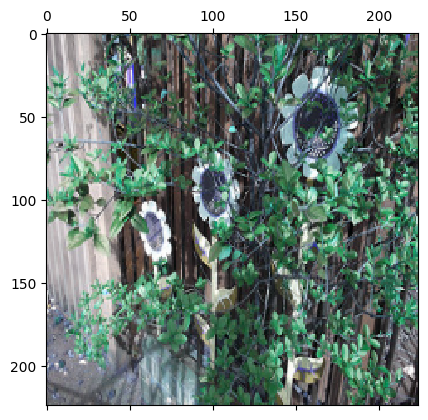

In [ ]:
#Let's see the prediction for the random array
array_num = 11

plt.matshow(x_test[array_num])

In [ ]:
# The values we get here are the scores for each numbers f

y_predicted = model.predict(x_test_scaled)
y_predicted[array_num]

39/39 [==============================] - 28s 705ms/step


array([-5.504758 , -3.9049072, -7.2856913, -3.6280777,  1.006347 ],
      dtype=float32)

In [ ]:
#A numpy function to find the maximum value and print the index

np.argmax(y_predicted[array_num])

4

39/39 [==============================] - 25s 648ms/step
predicted_class =  tulips


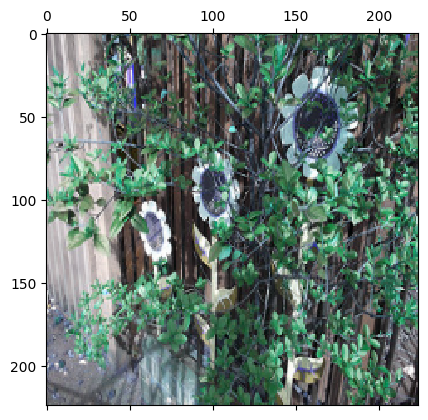

In [ ]:
y_predicted = model.predict(x_test_scaled)
predicted_number = np.argmax(y_predicted[array_num])

plt.matshow(x_test[array_num])
print("predicted_class = ", list(flowers_labels_dict.keys())[predicted_number])

## 1. To get a feel of how the prediction look like = Plot accuracy loss

***

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the Neural Network
    """
    #fig = plt.figure(figsize=(10,5))
    
    
    # Plot accuracy
    #plt.subplot(221)
    plt.plot(model_fit.history['acc'], 'bo--', label = "acc")
    plt.plot(model_fit.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.grid()
    plt.figure()

    
    # Plot loss function
    #plt.subplot(222)
    plt.plot(model_fit.history['loss'], 'bo--', label = "loss")
    plt.plot(model_fit.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.grid()
    plt.figure()

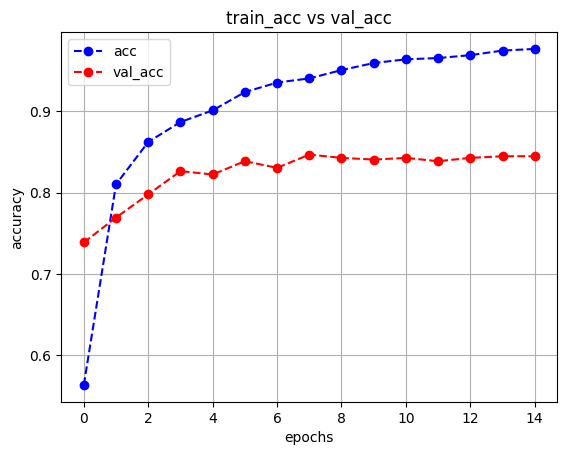

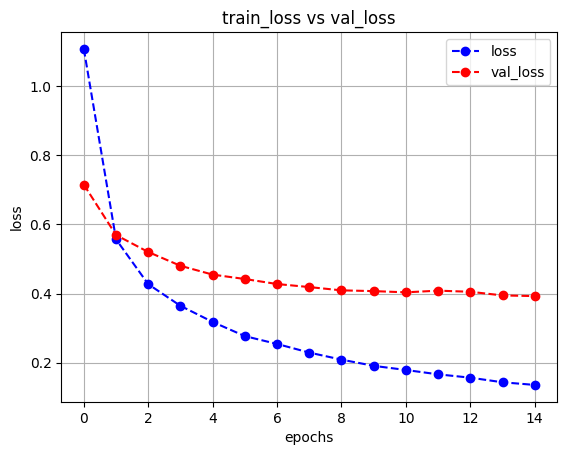

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_accuracy_loss(model_fit)

## 2. To get a feel of how the prediction look like = use a confusion matrix
***

In [ ]:
# First change the socres into the indexes for every array

y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[3, 3, 3, 3, 2, 2, 4, 2, 0, 4]

In [ ]:
# change the indexes into flower classes

flower_classes=[ ]

for i in y_predicted_labels: 
    a = list(flowers_labels_dict.keys())[y_predicted_labels[i]]
    flower_classes.append(a)
    
flower_classes[:10]

['sunflowers',
 'sunflowers',
 'sunflowers',
 'sunflowers',
 'sunflowers',
 'sunflowers',
 'dandelion',
 'sunflowers',
 'sunflowers',
 'dandelion']

In [ ]:
flower_labels = list(flowers_labels_dict.keys())
flower_labels

['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

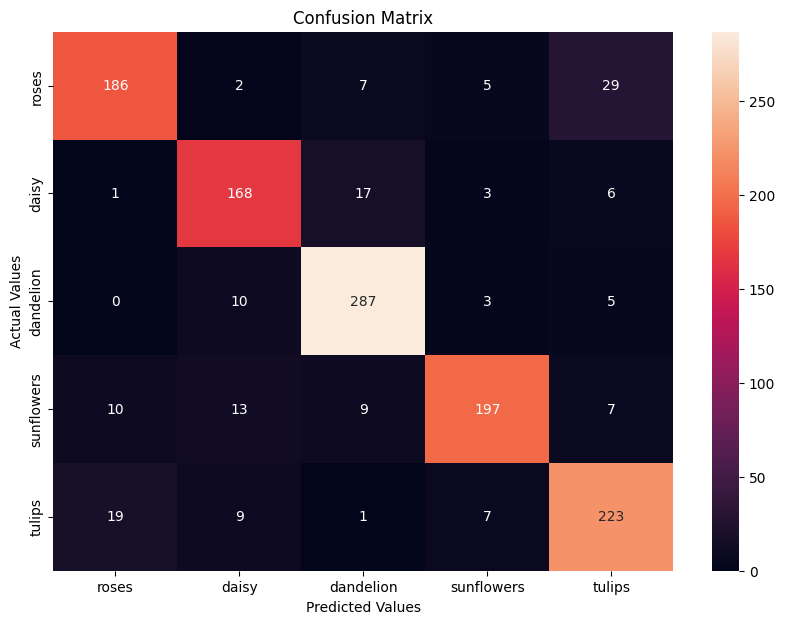

In [ ]:
import seaborn as sn

cm = tf.math.confusion_matrix(y_test, y_predicted_labels)

cm_df = pd.DataFrame(cm,
                     index = flower_labels,
                     columns = flower_labels)

#Plotting the confusion matrix
plt.figure(figsize=(10,7))
sn.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
